<a href="https://colab.research.google.com/github/parth-gulati/CMPT-732/blob/main/Bezier_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

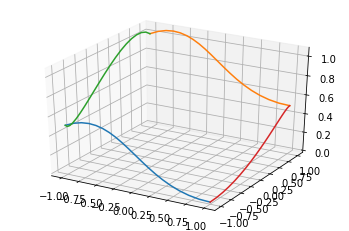

In [12]:
arr = []
temp_arr = []
counter = 0

def bezier_curve(p0, p1, p3, p2): 
    #p0 is endpoint 1
    #p1 is handle point 1
    #p2 is endpoint 2
    #p3 is handle point 2
    t = np.linspace(0, 1, 20, endpoint=True, dtype=float)
    bezier_coordinates = []
    for s in t: 
        b0 = (1 - s) ** 3
        b1 = 3 * (1 - s) ** 2 * s
        b2 = 3 * (1 - s) * s ** 2
        b3 = s ** 3
        
        bezier_coordinates.append(b0 * p0 + b1 * p1 + b2 * p2 + b3 * p3)
    
    return np.array(bezier_coordinates)
        

with open('coons_patch_points.txt') as f:
    for line in f:
        
        point = np.fromstring(line, dtype=float, sep = ' ')
        temp_arr.append(point)
        
        counter+=1
        
        if counter == 4:
            counter = 0
            arr.append(np.array(temp_arr))
            temp_arr = []
    arr = np.array(arr)

g1 = bezier_curve(arr[0][0], arr[0][1], arr[0][2], arr[0][3])
g2 = bezier_curve(arr[1][0], arr[1][1], arr[1][2], arr[1][3])
h1 = bezier_curve(arr[2][0], arr[2][1], arr[2][2], arr[2][3])
h2 = bezier_curve(arr[3][0], arr[3][1], arr[3][2], arr[3][3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(g1[:,0],g1[:,1],g1[:,2])
ax.plot(g2[:,0],g2[:,1],g2[:,2])
ax.plot(h1[:,0],h1[:,1],h1[:,2])
ax.plot(h2[:,0],h2[:,1],h2[:,2])

plt.show()


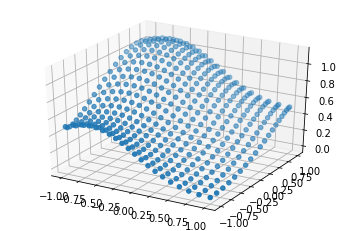

In [34]:
#coons patch
T = np.linspace(0, 1, 20, endpoint=True, dtype=float)
S = np.linspace(0, 1, 20, endpoint=True, dtype=float)

Lc = []
Ld = []
Bst = []

for s in range(len(S)):
  for t in range(len(T)):
    x = (1-T[t]) * g1[s] + g2[s] * T[t]
    y = (1-S[s]) * h1[t] + h2[t] * S[s]
    z = g1[0] * (1-S[s]) * (1-T[t]) + g1[-1] * S[s] * (1 - T[t]) + g2[0] * (1 - S[s]) * T[t] + g2[-1] * S[s] * T[t]
    Lc.append(x)
    Ld.append(y)
    Bst.append(z)

Lc = np.array(Lc)
Ld = np.array(Ld)
Bst = np.array(Bst)

Cst = Lc + Ld - Bst

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Cst[:,0], Cst[:,1], Cst[:,2])

plt.show()
